In [1]:
import pandas as pd
import numpy as np

In [564]:
df=pd.read_csv('api.csv', encoding='utf-8')

In [565]:
allowed_labels = ['major', 'minor', 'patch']
labels = df[df['label'].isin(allowed_labels)]
labels.fillna(0, inplace=True)

/var/folders/27/mp6sy3_d6_lgz19hyp_8n8z40000gn/T/ipykernel_2930/26112486.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [566]:
labels.drop(['commit_date','info_version','api_spec_id','id'], axis=1, inplace=True)

/var/folders/27/mp6sy3_d6_lgz19hyp_8n8z40000gn/T/ipykernel_2930/912750066.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### FEATURE SELECTION


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

In [567]:
# define a dictionary that maps labels to numbers
label_to_number = {'major': 0, 'minor': 1, 'patch': 2}

# use the map() method to apply the mapping to the label column
labels['label'] = labels['label'].map(label_to_number)

/var/folders/27/mp6sy3_d6_lgz19hyp_8n8z40000gn/T/ipykernel_2930/3661850546.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier



X = labels.drop(['label','externalDocs.added','externalDocs.deleted'], axis=1)
y = labels['label'] # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define candidate estimators
estimators = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    LinearDiscriminantAnalysis(),
    ExtraTreesClassifier(),
    XGBClassifier()

]

# Perform k-fold cross-validation on each estimator and compute average score
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for estimator in estimators:
    scores = cross_val_score(estimator, X, y, cv=cv)
    print(f"{type(estimator).__name__}: {scores.mean()}")

DecisionTreeRegressor: 0.07658582911947909
RandomForestRegressor: 0.12617137041583337
SVR: -0.063143535266873
GradientBoostingClassifier: 0.7142857142857142
RandomForestClassifier: 0.7193277310924369
LogisticRegression: 0.7027077497665732
KNeighborsClassifier: 0.6840336134453782
GaussianNB: 0.6916900093370681
SVC: 0.7023342670401493
LinearDiscriminantAnalysis: 0.7010270774976657
ExtraTreesClassifier: 0.7172735760971054
XGBClassifier: 0.7161531279178337


In [40]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



# Load labels data with major minor and patch only

X = labels.drop(['label'], axis=1)
y = labels['label'] # Target variable

# Define the estimator
# linear regression - gave not so good results
# gradient and random forest gave similar results


estimator = GradientBoostingClassifier(n_estimators=100, max_depth=5)

#estimator = RandomForestClassifier(n_estimators=100, max_depth=5)


# Create RFE object
rfe = RFE(estimator, n_features_to_select=10)

# Fit RFE object to the data
rfe.fit(X, y)

# Print selected features and their ranking
print('Selected features: %s' % list(X.columns[rfe.support_]))



Selected features: ['Endpoints_added', 'Servers_added', 'Paths_added', 'Paths_deleted', 'Tags_deleted', 'Components_Schemas_Added', 'Info_description_changes', 'Tags_modified', 'Paths_modified', 'Endpoints_modified']


In [562]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



# Load labels data with major minor and patch only

X = labels.drop(['label'], axis=1)
y = labels['label'] # Target variable

# Define the estimator
# linear regression - gave not so good results
# gradient and random forest gave similar results


estimator = XGBClassifier(n_estimators=100, max_depth=5)

#estimator = RandomForestClassifier(n_estimators=100, max_depth=5)


# Create RFE object
rfe = RFE(estimator, n_features_to_select=10)

# Fit RFE object to the data
rfe.fit(X, y)

# Print selected features and their ranking
print('Selected features: %s' % list(X.columns[rfe.support_]))



Selected features: ['Endpoints_added', 'Servers_added', 'Tags_deleted', 'Components_Schemas_Added', 'Info_termsOfService_changes', 'Tags_modified', 'Paths_modified', 'Security_modified', 'Security_deleted', 'Endpoints_modified']


In [569]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier


# Load labels data with major minor and patch only

X = labels.drop(['label'], axis=1)
y = labels['label'] # Target variable

# Define the estimator
# linear regression - gave not so good results
# gradient and random forest gave similar results


estimator = ExtraTreesClassifier(n_estimators=100, max_depth=5)

#estimator = RandomForestClassifier(n_estimators=100, max_depth=5)


# Create RFE object
rfe = RFE(estimator, n_features_to_select=10)

# Fit RFE object to the data
rfe.fit(X, y)

# Print selected features and their ranking
print('Selected features: %s' % list(X.columns[rfe.support_]))



Selected features: ['Endpoints_added', 'Endpoints_deleted', 'Components_parameters_added', 'Paths_added', 'Components_Schemas_Added', 'Info_description_changes', 'Info_termsOfService_changes', 'Tags_modified', 'Paths_modified', 'Endpoints_modified']


In [74]:
## Feature Importance with SelectKBest

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = labels.drop(['label','commit_date','info_version','id','api_spec_id','externalDocs.added','externalDocs.deleted'], axis=1)
y = labels['label'] # Target variable


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

                                  Specs        Score
24             Info_description_changes  7352.164395
19             Components_Schemas_Added  2526.460369
32                        Tags_modified  1812.692453
37                   Endpoints_modified  1626.523358
33                       Paths_modified  1192.193529
2                       Endpoints_added   541.848477
7                           Paths_added   386.907301
3                     Endpoints_deleted   165.410785
8                         Paths_deleted   118.664282
4           Components_parameters_added   107.402977
17           Components_Responses_Added    80.205270
20           Components_Schemas_Deleted    40.329016
10  Components_Security_Schemes_deleted    35.713568
16    Components_Request_Bodies_Deleted    35.692352
36                     Security_deleted    26.464768


In [571]:
from sklearn.feature_selection import mutual_info_classif


X = labels.drop(['label','externalDocs.added','externalDocs.deleted'], axis=1)
y = labels['label'] # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00347571, 0.        , 0.01546953, 0.01213979, 0.00481043,
       0.00220943, 0.00530781, 0.01207672, 0.01126293, 0.        ,
       0.00382588, 0.        , 0.        , 0.        , 0.00483186,
       0.00079809, 0.02069783, 0.00373418, 0.00104031, 0.01546619,
       0.        , 0.        , 0.        , 0.00532827, 0.04411961,
       0.        , 0.00657026, 0.00171343, 0.01449384, 0.03516537,
       0.0142981 , 0.0063067 , 0.03806506, 0.04461522, 0.00689244,
       0.        , 0.        , 0.05540557])

In [572]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Endpoints_modified                      0.055406
Paths_modified                          0.044615
Info_description_changes                0.044120
Tags_modified                           0.038065
Info_termsOfService_changes             0.035165
Components_Request_Bodies_Deleted       0.020698
Endpoints_added                         0.015470
Components_Schemas_Added                0.015466
Info_license_url_changes                0.014494
Components_parameters_deleted           0.014298
Endpoints_deleted                       0.012140
Paths_added                             0.012077
Paths_deleted                           0.011263
Security_modified                       0.006892
Info_contact_email_changes              0.006570
Components_Security_Schemes_modified    0.006307
Info_title_changes                      0.005328
Servers_deleted                         0.005308
Components_Headers_Deleted              0.004832
Components_parameters_added             0.004810
Components_Security_

<AxesSubplot: >

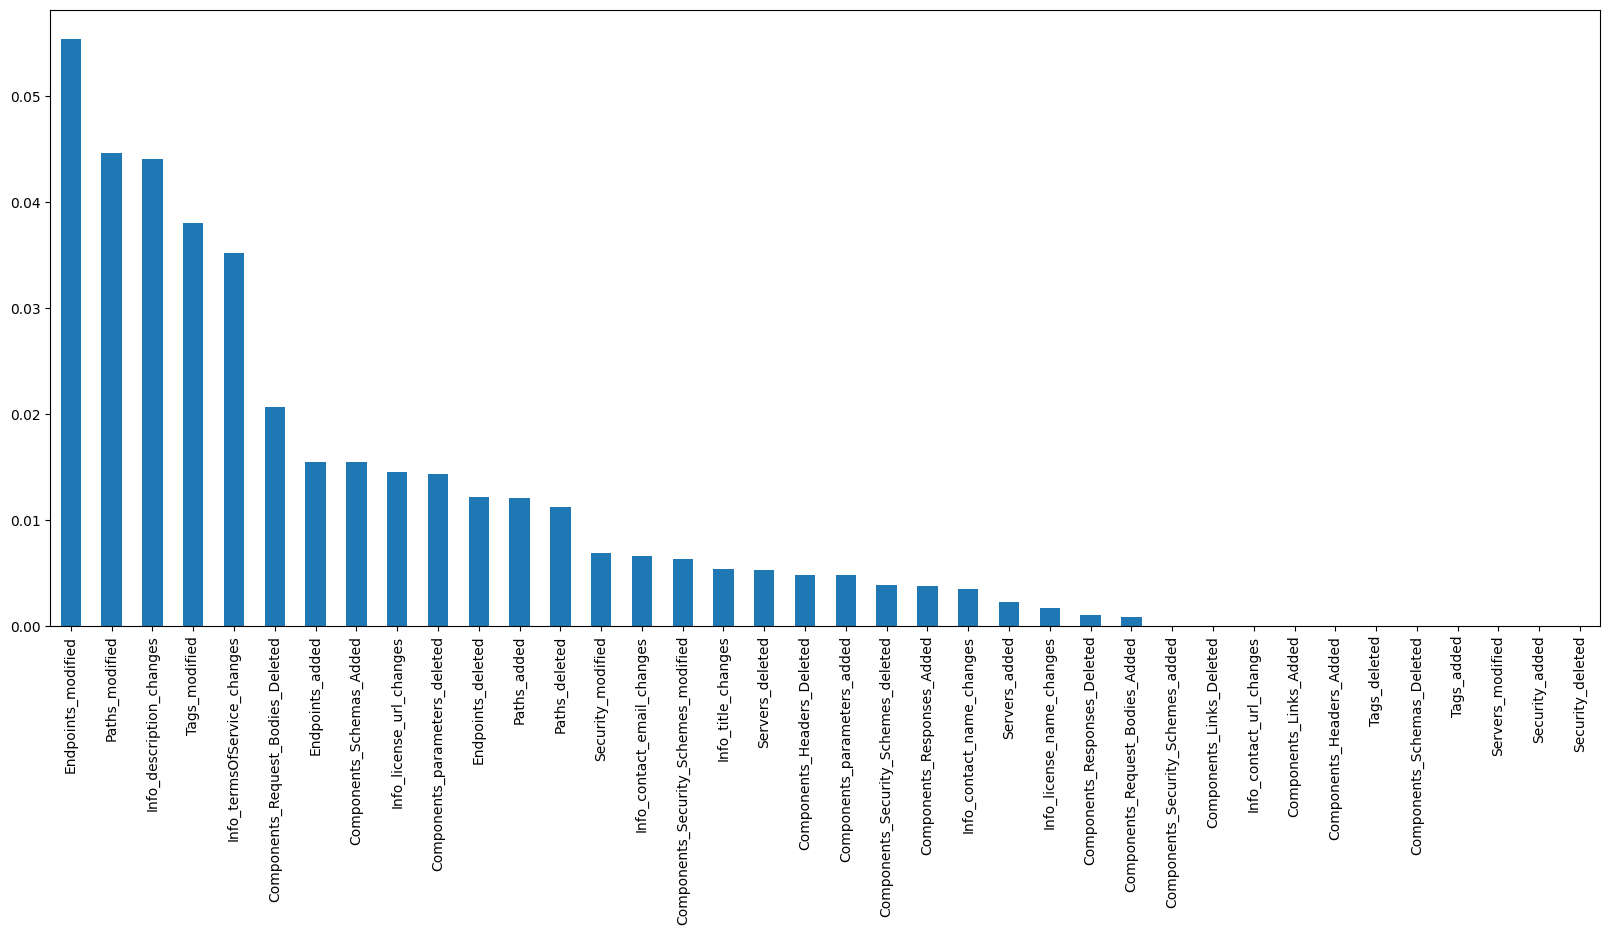

In [573]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [575]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Info_contact_name_changes', 'Endpoints_added', 'Endpoints_deleted',
       'Paths_added', 'Components_Schemas_Added', 'Info_description_changes',
       'Info_termsOfService_changes', 'Tags_modified', 'Paths_modified',
       'Endpoints_modified'],
      dtype='object')

In [77]:
import statsmodels.api as sm

X = labels.drop(['label','commit_date','info_version','id','api_spec_id','externalDocs.added','externalDocs.deleted'], axis=1)
y = labels['label'] # Target variable

X_new = sm.add_constant(X)
model = sm.OLS(y, X_new).fit()
model.pvalues

selected_features = list(X.columns)
pmax = 1
while (len(selected_features)>0):
    p= []
    X_new = X[selected_features]
    X_new = sm.add_constant(X_new)
    model = sm.OLS(y,X_new).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_pmax = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(feature_pmax)
    else:
        break
selected_features

const                                   3.126758e-08
Info_contact_name_changes               8.526256e-01
Servers_modified                        1.990954e-01
Endpoints_added                         3.389723e-02
Endpoints_deleted                       6.442135e-01
Components_parameters_added             1.214489e-01
Servers_added                           6.703685e-01
Servers_deleted                         5.840203e-01
Paths_added                             5.449895e-01
Paths_deleted                           6.195662e-01
Components_Security_Schemes_added       2.449627e-01
Components_Security_Schemes_deleted     5.513077e-04
Tags_added                              1.730276e-02
Tags_deleted                            1.338196e-02
Components_Headers_Added                8.630832e-01
Components_Headers_Deleted              3.533390e-01
Components_Request_Bodies_Added         1.006693e-01
Components_Request_Bodies_Deleted       1.120388e-02
Components_Responses_Added              3.5307

In [78]:
selected_features = list(X.columns)
pmax = 1
while (len(selected_features)>0):
    p= []
    X_new = X[selected_features]
    X_new = sm.add_constant(X_new)
    model = sm.OLS(y,X_new).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_pmax = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(feature_pmax)
    else:
        break
selected_features

['Endpoints_added',
 'Components_Security_Schemes_deleted',
 'Tags_deleted',
 'Components_Request_Bodies_Added',
 'Components_Request_Bodies_Deleted',
 'Components_Schemas_Added',
 'Info_description_changes',
 'Info_termsOfService_changes',
 'Components_Security_Schemes_modified',
 'Tags_modified',
 'Paths_modified',
 'Security_modified',
 'Security_deleted',
 'Endpoints_modified']

#### PCA


In [456]:
df['commit_date'] = pd.to_datetime(df['commit_date'])

df_2014 = df.loc[df['commit_date'].dt.year == 2014]
df_2015 = df.loc[df['commit_date'].dt.year == 2015]
df_2016 = df.loc[df['commit_date'].dt.year == 2016]
df_2017 = df.loc[df['commit_date'].dt.year == 2017]
df_2018 = df.loc[df['commit_date'].dt.year == 2018]
df_2019 = df.loc[df['commit_date'].dt.year == 2019]
df_2020 = df.loc[df['commit_date'].dt.year == 2020]
df_2021 = df.loc[df['commit_date'].dt.year == 2021]
df_2022 = df.loc[df['commit_date'].dt.year == 2022]

In [600]:
df_2017['Endpoints_modified'].value_counts().describe()

count      44.000000
mean      195.204545
std       866.627266
min         1.000000
25%         2.750000
50%        12.000000
75%        50.250000
max      5712.000000
Name: Endpoints_modified, dtype: float64

In [455]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Feature columns to use for cosine similarity calculation
cols_to_use = labels.loc[:, "Info_contact_name_changes":"Endpoints_modified"].columns

# New column for cosine similarity
labels['cosine_sim'] = np.nan

# Looping through each api_spec_id
for api_spec_id in labels['api_spec_id'].unique():
    # Get the rows for the current api_spec_id
    api_rows = labels[labels['api_spec_id'] == api_spec_id].sort_values(by='commit_date')

    # Set the cosine similarity of the first row to NaN, since there is no previous row to compare to
    labels.loc[api_rows.index[0], 'cosine_sim'] = np.nan
    
    # Calculate the cosine similarity for consecutive rows
    for i in range(1, len(api_rows)):
        # Get the previous and current row
        prev_row = api_rows.iloc[i-1][cols_to_use]
        curr_row = api_rows.iloc[i][cols_to_use]
        
        # Calculate the cosine similarity and store it in the 'cosine_sim' column
        cosine_sim = cosine_similarity([prev_row], [curr_row])[0][0]
        labels.loc[api_rows.index[i], 'cosine_sim'] = cosine_sim

/var/folders/27/mp6sy3_d6_lgz19hyp_8n8z40000gn/T/ipykernel_2930/882484985.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [184]:
# for practice dataframe
avg_cosine_sim = labels.groupby('api_spec_id')['cosine_sim'].mean()

# add average cosine distance to the dataframe
labels['avg_cosine_sim'] = labels['api_spec_id'].map(avg_cosine_sim)


/var/folders/27/mp6sy3_d6_lgz19hyp_8n8z40000gn/T/ipykernel_2930/397851503.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



fig=px.histogram(labels, x="cosine_sim", color="label", marginal="box", hover_data=labels.columns)
fig.show()
labels

data2= labels.query("api_spec_id==1074").sort_values(by='commit_date')
data2[['api_spec_id','cosine_sim', 'avg_cosine_sim']]

In [163]:
labels['Year']= pd.to_datetime(labels['commit_date']).dt.year

In [173]:
# Get columns to use
cols_to_use = labels.loc[:, "Info_contact_name_changes":"Endpoints_modified"].columns

# Find columns with all zero values
all_zero_cols = labels[cols_to_use].columns[(labels[cols_to_use] == 0).all()]

# Drop columns with all zero values
labels.drop(columns=all_zero_cols, inplace=True)


In [187]:
labels.drop(columns=['predicted_labels'], inplace=True)

/var/folders/27/mp6sy3_d6_lgz19hyp_8n8z40000gn/T/ipykernel_2930/763706223.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [190]:
labels.fillna(0, inplace=True)

/var/folders/27/mp6sy3_d6_lgz19hyp_8n8z40000gn/T/ipykernel_2930/3091135927.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [553]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# Get columns to use
cols_to_use = labels[['Endpoints_added', 'Servers_added', 'Paths_added', 'Paths_deleted', 'Tags_deleted', 'Components_Schemas_Added', 'Info_description_changes', 'Tags_modified', 'Paths_modified', 'Endpoints_modified']].columns

data_scaled = scaler.fit_transform(labels[cols_to_use])

# Define the model
model = GaussianMixture(n_components=3, random_state=32, max_iter=200, init_params='random', covariance_type='full', n_init=1, warm_start=True)

# Fit the model
model.fit(data_scaled)

# Get the cluster labels
cluster_labels = model.predict(data_scaled)

# Map the cluster labels to major, minor, and patch labels
label_map = {0: "major", 1: "minor", 2: "patch"}
predicted_labels = [label_map[label] for label in cluster_labels]

# Add the major, minor, and patch labels to the dataframe
labels["predicted_labels"] = predicted_labels

# Accuracy
print("Accuracy: ", accuracy_score(labels["label"], labels["predicted_labels"]))
# Precision
print("Precision: ", precision_score(labels["label"], labels["predicted_labels"], average="weighted"))
# Recall
print("Recall: ", recall_score(labels["label"], labels["predicted_labels"], average="weighted"))
# F1 score
print("F1 score: ", f1_score(labels["label"], labels["predicted_labels"], average="weighted"))

# Classification report
print(classification_report(labels["label"], labels["predicted_labels"]))


Accuracy:  0.634547152194211
Precision:  0.5636597996883228
Recall:  0.634547152194211
F1 score:  0.579644524368686
              precision    recall  f1-score   support

       major       0.08      0.06      0.07       561
       minor       0.33      0.11      0.16      1165
       patch       0.71      0.89      0.79      3629

    accuracy                           0.63      5355
   macro avg       0.37      0.35      0.34      5355
weighted avg       0.56      0.63      0.58      5355



In [465]:
labels.fillna(0, inplace=True)

/var/folders/27/mp6sy3_d6_lgz19hyp_8n8z40000gn/T/ipykernel_2930/3091135927.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [577]:
from sklearn.cluster import SpectralClustering

labels = pd.read_csv('labels.csv')
labels.fillna(0, inplace=True)

# Get columns to use
cols_to_use = labels[['Endpoints_added', 'Servers_added', 'Paths_added', 'Paths_deleted', 'Tags_deleted', 'Components_Schemas_Added', 'Info_description_changes', 'Tags_modified', 'Paths_modified', 'Endpoints_modified']].columns

data = labels[cols_to_use]

# Define the model and fit the data
model = SpectralClustering(n_clusters=3, affinity='cosine',random_state=32)
model.fit(data)

# Get the cluster labels
cluster_labels = model.labels_

# Map the cluster labels to major, minor, and patch labels
label_map = {0: "major", 1: "minor", 2: "patch"}
spectral = [label_map[label] for label in cluster_labels]

# Add the major, minor, and patch labels to the dataframe
labels["spectral"] = spectral

# Accuracy
print("Accuracy: ", accuracy_score(labels["label"], labels["spectral"]))
# Precision
print("Precision: ", precision_score(labels["label"], labels["spectral"], average="weighted"))
# Recall
print("Recall: ", recall_score(labels["label"], labels["spectral"], average="weighted"))
# F1 score
print("F1 score: ", f1_score(labels["label"], labels["spectral"], average="weighted"))


# Classification report
print(classification_report(labels["label"], labels["spectral"]))


Accuracy:  0.20989729225023343
Precision:  0.5713215381562639
Recall:  0.20989729225023343
F1 score:  0.2117068941516896
              precision    recall  f1-score   support

       major       0.12      0.91      0.21       561
       minor       0.42      0.06      0.11      1165
       patch       0.69      0.15      0.25      3629

    accuracy                           0.21      5355
   macro avg       0.41      0.37      0.19      5355
weighted avg       0.57      0.21      0.21      5355



In [546]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# actual labels and predicted labels
y_true = labels['label']
y_pred = labels['spectral']

# create confusion matrix
labels = ['major', 'minor', 'patch']
cm = confusion_matrix(y_true, y_pred, labels=labels)

fig = go.Figure(data=go.Heatmap(
                   z=cm,
                   x=labels,
                   y=labels,
                   colorscale='Blues',
                   hoverongaps=False))

# customize heatmap layout
fig.update_layout(
    title='Confusion Matrix for Spectral Clustering',
    xaxis=dict(title='Predicted Labels'),
    yaxis=dict(title='True Labels'))

# add annotations to heatmap
for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(x=labels[i], y=labels[j], text=str(cm[j][i]),
                           font=dict(color='black', size=14),
                           showarrow=False)

# show plot
fig.show()

In [554]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# actual labels and predicted labels
y_true = labels['label']
y_pred = labels['predicted_labels']

# create confusion matrix
labels = ['major', 'minor', 'patch']
cm = confusion_matrix(y_true, y_pred, labels=labels)

fig = go.Figure(data=go.Heatmap(
                   z=cm,
                   x=labels,
                   y=labels,
                   colorscale='Blues',
                   hoverongaps=False))

# customize heatmap layout
fig.update_layout(
    title='Confusion Matrix for Gaussian Mixture Model',
    xaxis=dict(title='Predicted Labels'),
    yaxis=dict(title='True Labels'))

# add annotations to heatmap
for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(x=labels[i], y=labels[j], text=str(cm[j][i]),
                           font=dict(color='black', size=14),
                           showarrow=False)

# show plot
fig.show()

In [491]:
labels['spectral'].groupby(labels['label']).value_counts()

label  spectral
major  major        509
       patch         30
       minor         22
minor  major        879
       patch        212
       minor         74
patch  major       3007
       patch        541
       minor         81
Name: spectral, dtype: int64

In [483]:
pip install kmodes


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [195]:
labels.to_csv ('labels.csv', index = False, header=True)

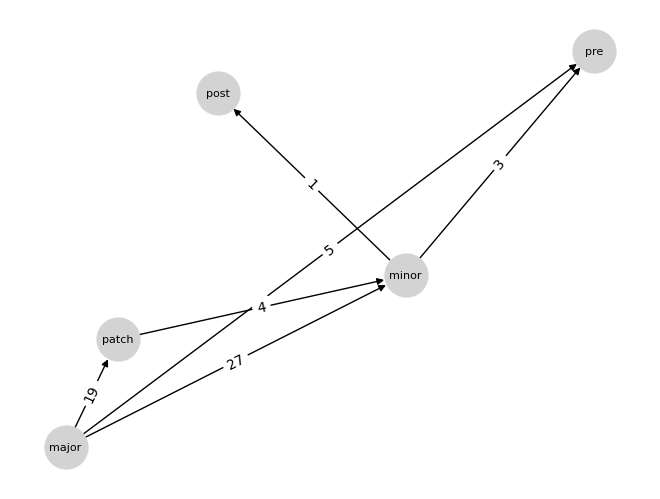

In [543]:
import networkx as nx
import matplotlib.pyplot as plt

s = df_2015['label'].astype(str).value_counts().dropna()

tmp = (
 s.reset_index(name='label')
  .sort_values(by='index', key=lambda s: s.str.count('.'))
  .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$')))
  .drop_duplicates(subset=[0, 1])
)

tmp = tmp.dropna(subset=[0, 1])

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.DiGraph, edge_attr='label')

pos = nx.spring_layout(G, k=0.1, iterations=5)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightgray',linewidths=0.2, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'));


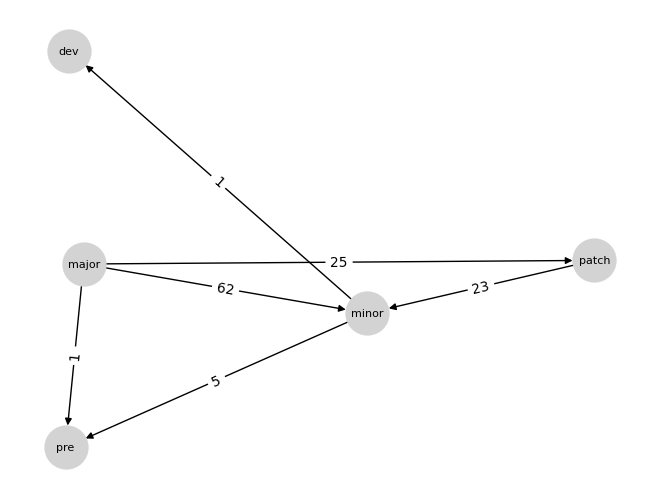

In [545]:
import networkx as nx
import matplotlib.pyplot as plt

s = df_2016['label'].astype(str).value_counts().dropna()

tmp = (
 s.reset_index(name='label')
  .sort_values(by='index', key=lambda s: s.str.count('.'))
  .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$')))
  .drop_duplicates(subset=[0, 1])
)

tmp = tmp.dropna(subset=[0, 1])

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.DiGraph, edge_attr='label')

pos = nx.spring_layout(G, k=0.1, iterations=5)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightgray',linewidths=0.2, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'));


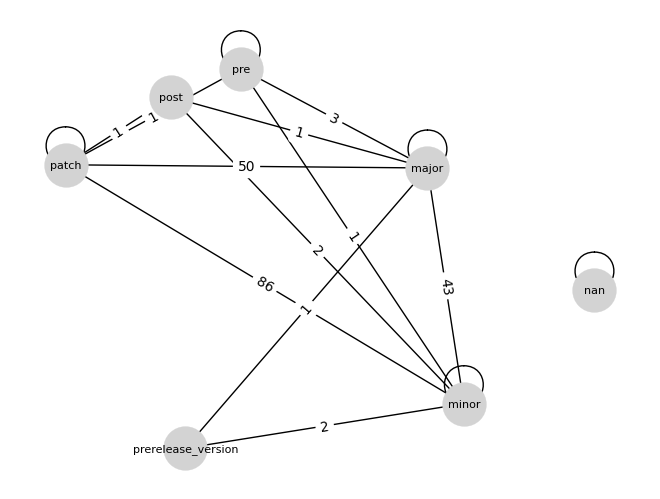

In [636]:
import networkx as nx
import matplotlib.pyplot as plt

s = df_2017['label'].astype(str).value_counts().dropna()

tmp = (
 s.reset_index(name='label')
  .sort_values(by='index', key=lambda s: s.str.count('.'))
  .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
  .drop_duplicates(subset=[0, 1])
)

tmp = tmp.dropna(subset=[0, 1])

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')

pos = nx.spring_layout(G, k=0.1, iterations=5)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightgray',linewidths=0.2, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'));

In [638]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 653.4 kB/s eta 0:00:00 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [650]:
import networkx as nx
import graphviz

s = df_2017['label'].astype(str).value_counts().dropna()

tmp = (
    s.reset_index(name='label')
    .sort_values(by='index', key=lambda s: s.str.count('.'))
    .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
    .drop_duplicates(subset=[0, 1])
)

tmp = tmp.dropna(subset=[0, 1])

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')


dot = graphviz.Graph()
for node in G.nodes:
    dot.node(str(node))

for edge in G.edges:
    label = G.edges[edge]['label']
    dot.edge(str(edge[0]), str(edge[1]), label=str(label))
dot


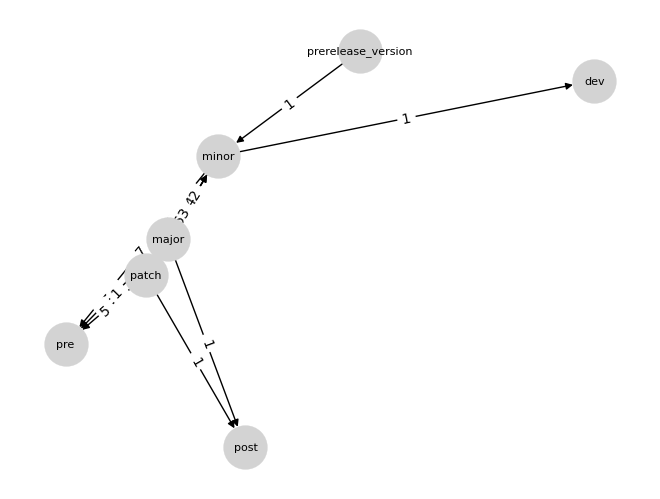

In [647]:
import networkx as nx
import matplotlib.pyplot as plt

s = df_2018['label'].astype(str).value_counts().dropna()

tmp = (
 s.reset_index(name='label')
  .sort_values(by='index', key=lambda s: s.str.count('.'))
  .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$')))
  .drop_duplicates(subset=[0, 1])
)

tmp = tmp.dropna(subset=[0, 1])

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.DiGraph, edge_attr='label')

pos = nx.spring_layout(G, k=0.1, iterations=5)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightgray',linewidths=0.2, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'));


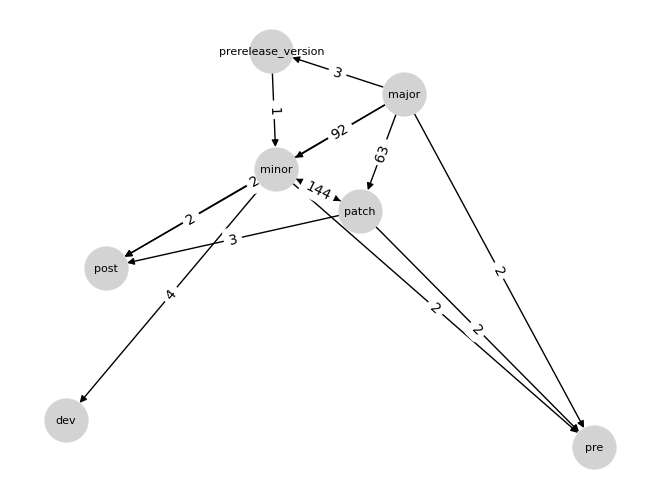

In [538]:
import networkx as nx
import matplotlib.pyplot as plt

s = df_2019['label'].astype(str).value_counts().dropna()

tmp = (
 s.reset_index(name='label')
  .sort_values(by='index', key=lambda s: s.str.count('.'))
  .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$')))
  .drop_duplicates(subset=[0, 1])
)

tmp = tmp.dropna(subset=[0, 1])

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.DiGraph, edge_attr='label')

pos = nx.spring_layout(G, k=0.1, iterations=5)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightgray',linewidths=0.2, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'));


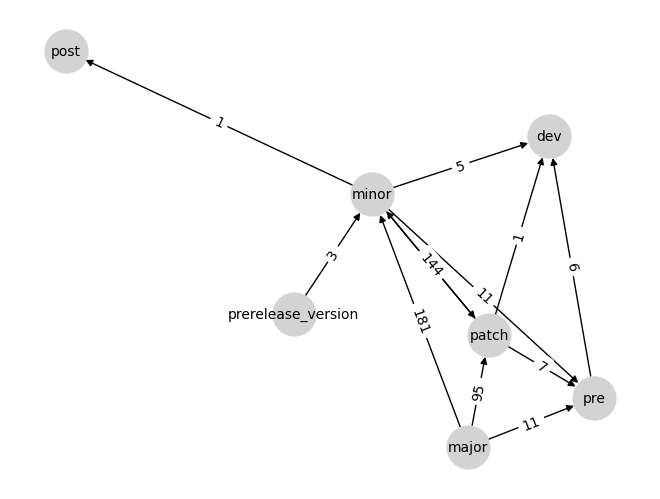

In [380]:
import networkx as nx
import matplotlib.pyplot as plt

s = df_2020['label'].astype(str).value_counts().dropna()

tmp = (
 s.reset_index(name='label')
  .sort_values(by='index', key=lambda s: s.str.count('.'))
  .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$')))
  .drop_duplicates(subset=[0, 1])
)

tmp = tmp.dropna(subset=[0, 1])

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.DiGraph, edge_attr='label')


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightgray',linewidths=0.2, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'));


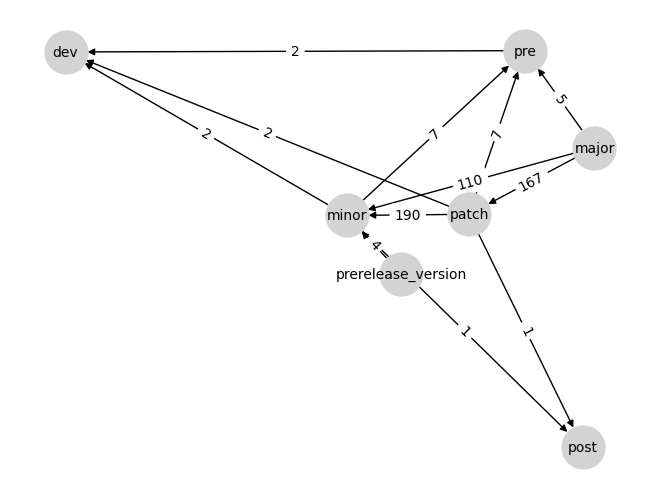

In [448]:
import networkx as nx
import matplotlib.pyplot as plt

s = df_2021['label'].astype(str).value_counts().dropna()

tmp = (
 s.reset_index(name='label')
  .sort_values(by='index', key=lambda s: s.str.count('.'))
  .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$')))
  .drop_duplicates(subset=[0, 1])
)

tmp = tmp.dropna(subset=[0, 1])

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.DiGraph, edge_attr='label')


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightgray',linewidths=0.2, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'));


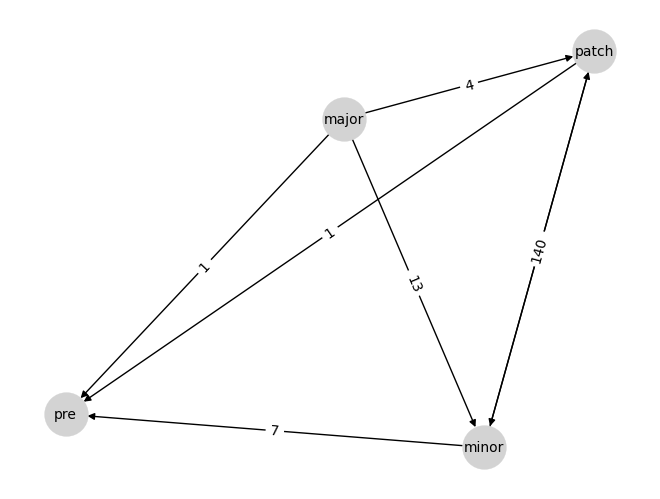

In [386]:
import networkx as nx
import matplotlib.pyplot as plt

s = df_2022['label'].astype(str).value_counts().dropna()

tmp = (
 s.reset_index(name='label')
  .sort_values(by='index', key=lambda s: s.str.count('.'))
  .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$')))
  .drop_duplicates(subset=[0, 1])
)

tmp = tmp.dropna(subset=[0, 1])

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.DiGraph, edge_attr='label')


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightgray',linewidths=0.2, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'));
